# Using R to read data and plot 

(Questions? Feel free to create a new issue in the workshop's github repo [here](https://github.com/NIH-NICHD/Kids-First-Elements-of-Style-Workflow-Creation-Maintenance/issues))

We will utilise the  data from from [Bioconductor's Rnaseq Workflow](http://master.bioconductor.org/packages/release/workflows/vignettes/rnaseqGene/inst/doc/rnaseqGene.html). We will see this dataset again a little later from another R package  for plotting. For retrieving the results of the differential expression analysis, we will follow the tutorial (from Section 3.1) of the RNA-seq workflow. Specifically, we will load the [airway](https://bioconductor.org/packages/release/data/experiment/html/airway.html) data, where different airway smooth muscle cells were treated with dexamethasone. We will use this dataset to explore different visualisations for presenting differential abundance. While the data we will use are from an RNAseq experiment, we can utilise the same visualisations for other omics data such as proteomics or metabolomics after the relevant preprocessing.

For this course we have uploaded the data in **ZENODO**, to make it easier to use them in the tutorial.

The pre-processed data can be found at: https://doi.org/10.5281/zenodo.4317512

To retrieve the data in your terminal, run the following commands within a **terminal** window
```bash
cd /sbgenomics/workspace/Kids-First-Elements-of-Style-Workflow-Creation-Maintenance/classes/Running-a-JupyterLab-Notebook
wget https://zenodo.org/record/4302133/files/deseq2_5k.csv
```

## Loading libraries

In [1]:
install.packages("rlang")
devtools::install_github('kevinblighe/EnhancedVolcano')
install.packages("data.table")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

Skipping install of 'EnhancedVolcano' from a github remote, the SHA1 (7abca284) has not changed since last install.
  Use `force = TRUE` to force installation

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done



In [2]:
library(data.table)
library(EnhancedVolcano)

Loading required package: ggplot2

Loading required package: ggrepel



In [3]:
results <- data.table::fread(file = "deseq2_5k.csv")

# Let's inspect the results 
We quickly notice the log2FoldChange and adjusted pValue. In a differential expression experiment, these two metrics give us a quick overview of the most interesting measured transcripts of genes.

In [4]:
head(results)

baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,feature
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
708.6021697,-0.38125389,0.1006544,-3.7877507,0.0001520173,0.001283638,ENSG00000000003
0.0000000,NA,NA,NA,NA,NA,ENSG00000000005
520.2979006,0.20681272,0.1122187,1.8429438,0.0653372101,0.196545841,ENSG00000000419
237.1630368,0.03792059,0.1434447,0.2643568,0.7915049630,0.911458001,ENSG00000000457
57.9326331,-0.08816770,0.2871420,-0.3070526,0.7588033355,0.895034450,ENSG00000000460
0.3180984,-1.37823397,3.4998753,-0.3937952,0.6937322727,NA,ENSG00000000938


# Easy volcano plots with `{EnhancedVolcano}` R package 📦

The `{EnhancedVolcano}` R package 📦 has been developed by [Kevin Blighe](https://www.biostars.org/u/41557/) - the name might seem familiar as you might have come across it several times if you find yourselves in [Biostars](https://www.biostars.org/u/41557/) frequently. Kevin Blighe, is not merely a very active Biostars users but also the admin! The `{EnhancedVolcano}` R package, is one very useful R package, as it provides great flexibility and ease for creating publication ready Volcano plots. We will be following the package `vignette`, which can be found [here](https://github.com/kevinblighe/EnhancedVolcano), in the respective GitHub repository.Let's see the package in action!

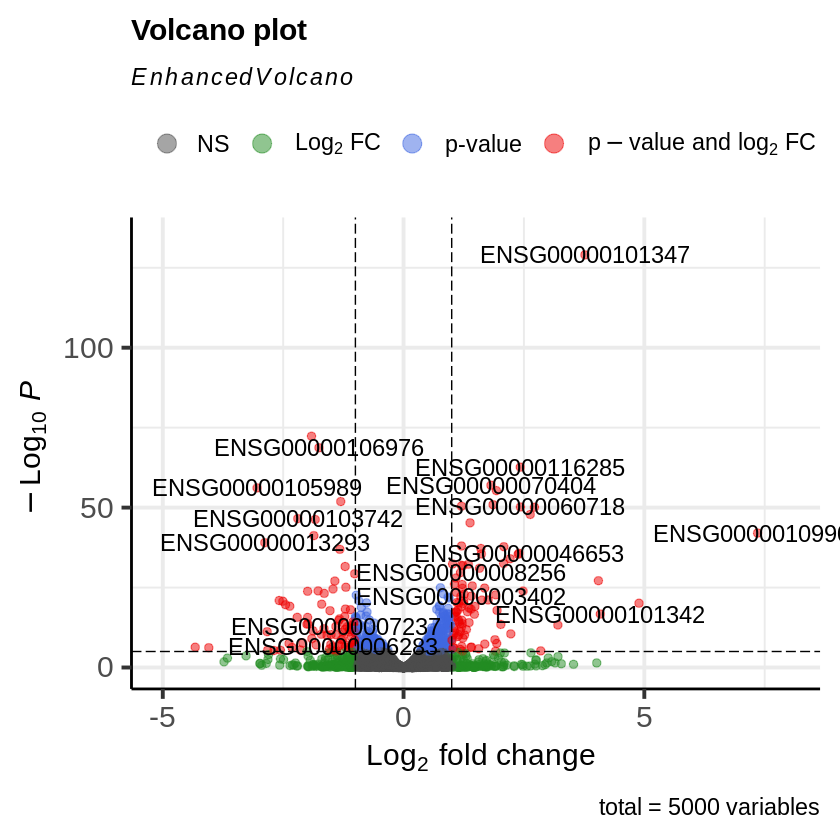

In [5]:
# A minimal function call, for a complete plot

gg<- EnhancedVolcano(toptable = results, 
                    lab = results$feature,
                    x = 'log2FoldChange',
                    y = 'pvalue',
                    xlim = c(-5, 8))

gg

# Let's customise the 🌋 plot a bit more

- Modify cut-offs for log2FC and P value
- specify title 
- adjust point and label size


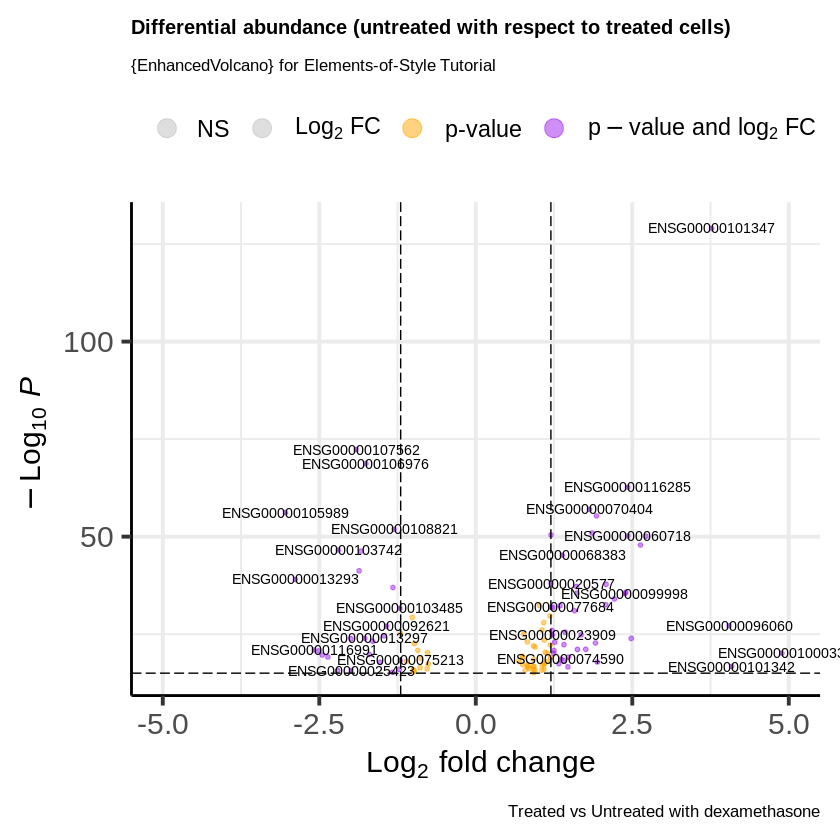

In [6]:
gg<-   EnhancedVolcano::EnhancedVolcano( results,    
                        col=c('grey', 'grey', 'orange', 'purple'),

                        lab = results$feature,
                        x = 'log2FoldChange',
                        y = 'pvalue',
                        xlim = c(-5, 5),
                        ylim = c(15,130),

                        title = 'Differential abundance (untreated with respect to treated cells)',  
                        titleLabSize = 12,
                       
                        subtitle = '{EnhancedVolcano} for Elements-of-Style Tutorial',
                        subtitleLabSize = 10,
                       
                        caption = "Treated vs Untreated with dexamethasone",
                        captionLabSize = 10,
                       
                        pCutoff = 10e-16,
                        FCcutoff = 1.2,
                        pointSize = 1.0,
                        labSize = 3.0)

gg

# Appendix

## Generating the data we used for the plot

To save some waiting time we loaded the precomputed results from the comparison described above, our set contrast for treated and untreated with dexamethasone muscle cells. You can reproduce this table by running the following code:


```r
# this code snippet is written in markdown, enclosed in ``` and will not be executed
# to run paste in a code cell

library(magrittr)
library('DESeq2')
library(airway)

data('airway')

levels(airway$dex)
airway$dex %<>% relevel('untrt')
levels(airway$dex)

dds <- DESeqDataSet(airway, design = ~ cell + dex)
dds <- DESeq(dds, betaPrior=FALSE)

res1 <- results(dds,contrast = c('dex','trt','untrt'))
subsampled_results <- res1[1:5000,]
subsampled_results$feature <- subsampled_results@rownames
                          
# Subsample and save an object to an Rds and a csv file
saveRDS(subsample_results, file = "deseq2_5k.rds")
loaded_results_RDS <- readRDS(file = "deseq2_5k.rds")
data.table::fwrite(as.data.frame(subsampled_results),
                   col.names = TRUE, 
                   row.names = FALSE,
                   file = "../data/2-plotting-in-R/deseq2_5k.csv", 
                   sep  =',')


```
